Importance = resulting coverage from placing a single sensor in that output area

In [1]:
from spineq.optimise import calc_oa_weights
from spineq.plotting import plot_oa_importance, plot_oa_weights

import pandas as pd

In [2]:
theta = 500
vmax = 0.05

## Total Population

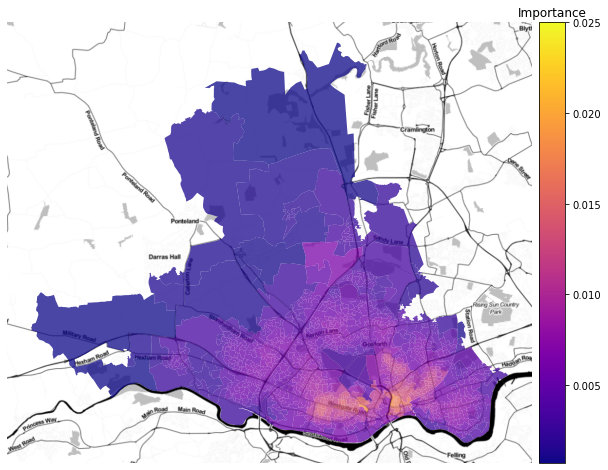

In [3]:
age_weights = 1
oa_weights = calc_oa_weights(age_weights=age_weights, population_weight=1, workplace_weight=0)
plot_oa_importance(oa_weights, figsize=(10,10), theta=theta, vmax=vmax)

## Children < 12

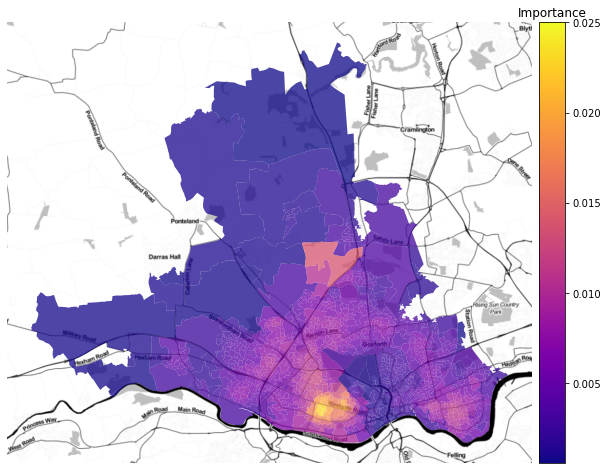

In [4]:
age_weights = pd.Series(0, index=range(91))
age_weights[age_weights.index<12] = 1

oa_weights = calc_oa_weights(age_weights=age_weights, population_weight=1, workplace_weight=0)

plot_oa_importance(oa_weights, figsize=(10,10), theta=theta, vmax=vmax)

## Adults >70

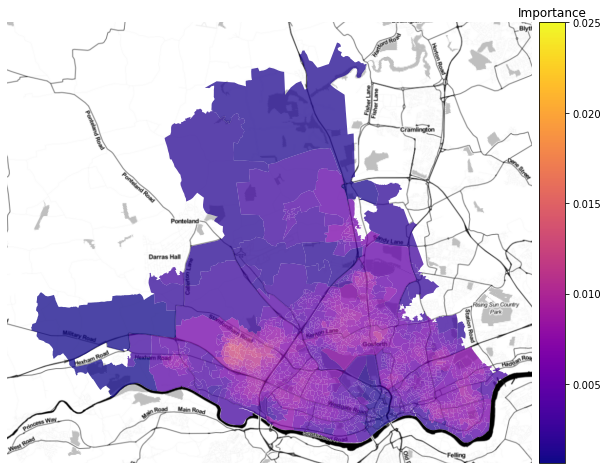

In [5]:
age_weights = pd.Series(0, index=range(91))
age_weights[age_weights.index>70] = 1

oa_weights = calc_oa_weights(age_weights=age_weights, population_weight=1, workplace_weight=0)

plot_oa_importance(oa_weights, figsize=(10,10), theta=theta, vmax=vmax)

## Workers

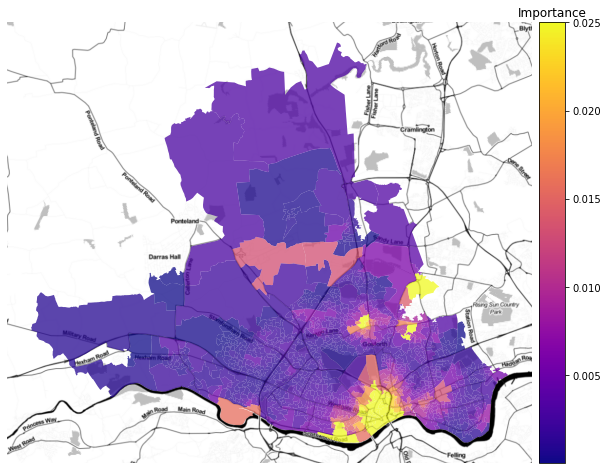

In [6]:
age_weights = 0

oa_weights = calc_oa_weights(age_weights=age_weights, population_weight=0, workplace_weight=1)

plot_oa_importance(oa_weights, figsize=(10,10), theta=theta, vmax=vmax)